In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from glob import glob
import os

In [2]:
val_acc = np.loadtxt('./ResNet_acc.txt', delimiter=',')
print(val_acc)

[[0.7009 0.7712 0.769  0.7433 0.7634]
 [0.7734 0.7969 0.8136 0.779  0.7321]
 [0.7612 0.798  0.8359 0.7734 0.8125]
 [0.8103 0.8705 0.8304 0.8047 0.856 ]
 [0.8058 0.8549 0.8426 0.8025 0.8973]
 [0.8672 0.9275 0.885  0.8527 0.9297]
 [0.8761 0.8895 0.8795 0.8884 0.9241]
 [0.8705 0.9397 0.8783 0.9007 0.9498]
 [0.9174 0.9498 0.904  0.9018 0.9509]
 [0.9319 0.9386 0.9241 0.8917 0.9431]
 [0.923  0.952  0.9252 0.9241 0.9498]
 [0.9386 0.9576 0.904  0.9397 0.9442]
 [0.9509 0.9721 0.9408 0.9386 0.9821]
 [0.9554 0.9654 0.9464 0.9598 0.9364]
 [0.9576 0.9743 0.9632 0.952  0.9576]
 [0.9453 0.9721 0.9654 0.9665 0.9654]
 [0.9688 0.9766 0.9743 0.9643 0.9766]
 [0.9353 0.9732 0.971  0.9565 0.9754]
 [0.9442 0.981  0.9732 0.9743 0.981 ]
 [0.9766 0.971  0.9788 0.9498 0.9688]
 [0.9676 0.9777 0.981  0.9621 0.9643]
 [0.9855 0.9821 0.9821 0.9665 0.9587]
 [0.9688 0.9833 0.9888 0.9721 0.9788]
 [0.9676 0.9788 0.981  0.9665 0.9877]
 [0.971  0.9632 0.9855 0.981  0.9699]
 [0.9721 0.9743 0.971  0.9821 0.9565]
 [0.9688 0.9

In [3]:
val_min = np.min(val_acc, axis=1)
print(val_min)

val_mean = np.mean(val_acc, axis=1)
print(val_mean)

val_max = np.max(val_acc, axis=1)
print(val_max)

[0.7009 0.7321 0.7612 0.8047 0.8025 0.8527 0.8761 0.8705 0.9018 0.8917
 0.923  0.904  0.9386 0.9364 0.952  0.9453 0.9643 0.9353 0.9442 0.9498
 0.9621 0.9587 0.9688 0.9665 0.9632 0.9565 0.9643 0.9688 0.9777 0.9576
 0.971  0.9632 0.9676 0.9676 0.9688 0.9721 0.971  0.971  0.9699 0.9688
 0.9732 0.9766 0.9788 0.9732 0.9799 0.9676 0.9721 0.9721 0.981  0.9788]
[0.74956 0.779   0.7962  0.83438 0.84062 0.89242 0.89152 0.9078  0.92478
 0.92588 0.93482 0.93682 0.9569  0.95268 0.96094 0.96294 0.97212 0.96228
 0.97074 0.969   0.97054 0.97498 0.97836 0.97632 0.97412 0.9712  0.97366
 0.97566 0.97858 0.9723  0.97812 0.97478 0.97564 0.97946 0.98014 0.9797
 0.979   0.97856 0.9748  0.98124 0.9817  0.9808  0.98414 0.98148 0.98506
 0.97948 0.98216 0.98302 0.98772 0.98596]
[0.7712 0.8136 0.8359 0.8705 0.8973 0.9297 0.9241 0.9498 0.9509 0.9431
 0.952  0.9576 0.9821 0.9654 0.9743 0.9721 0.9766 0.9754 0.981  0.9788
 0.981  0.9855 0.9888 0.9877 0.9855 0.9821 0.9855 0.9821 0.9788 0.9821
 0.9821 0.9855 0.9877 0.9

In [4]:
epochs = np.linspace(1, 50, num=50)

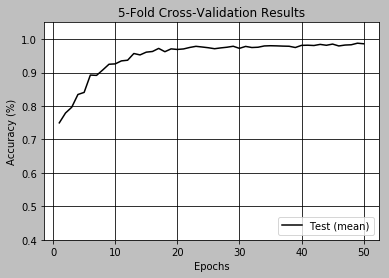

In [5]:
plt.style.use('grayscale')
plt.plot(epochs, val_mean, label='Test (mean)')
plt.legend(loc='lower right')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('5-Fold Cross-Validation Results')
plt.ylim([0.4, 1.05])
plt.grid()
plt.show()

In [6]:
res_dir = [y for x in os.walk('./icros-kfold/ResNet') for y in glob(os.path.join(x[0], '*accuracy*.csv'))]
res_dir.sort()
print(res_dir)

data = {}
for i in range(len(res_dir)):
    temp = np.genfromtxt(res_dir[i], delimiter=',')
    temp = temp[1:, 1:]
    key_name = res_dir[i].split('/')[-2]
    data[i] = temp

    
new_data = np.zeros((len(data.keys())+1, len(data[0])))
print(new_data.shape)

for i in range(new_data.shape[0]-1):
    if i == 0:
        new_data[0,:] = data[0][:,0] * (50/1392)
        new_data[1,:] = data[0][:,1]
    else:
        new_data[i+1,:] = data[i][:,1]
        
res_data = np.zeros((new_data.shape[1], 4))
res_data[:,0] = new_data[0,:]
res_data[:,1] = np.mean(new_data[1:], axis=0)
res_data[:,2] = np.min(new_data[1:], axis=0)
res_data[:,3] = np.max(new_data[1:], axis=0)
print(res_data)

['./icros-kfold/ResNet/run_tensorboard_HS_20180808_ResNet_50_hr0_valid0_50epoch_0_001-tag-accuracy_1.csv', './icros-kfold/ResNet/run_tensorboard_HS_20180808_ResNet_50_hr1_valid1_50epoch_0_001-tag-accuracy_1.csv', './icros-kfold/ResNet/run_tensorboard_HS_20180808_ResNet_50_hr2_valid2_50epoch_0_001-tag-accuracy_1.csv', './icros-kfold/ResNet/run_tensorboard_HS_20180808_ResNet_50_hr3_valid3_50epoch_0_001-tag-accuracy_1.csv', './icros-kfold/ResNet/run_tensorboard_HS_20180808_ResNet_50_hr4_valid4_50epoch_0_001-tag-accuracy_1.csv']
(6, 100)
[[ 0.          0.59375     0.5078125   0.671875  ]
 [ 0.7183908   0.7984375   0.75        0.8359375 ]
 [ 1.00574713  0.790625    0.7265625   0.8828125 ]
 [ 1.72413793  0.7921875   0.7421875   0.828125  ]
 [ 2.01149425  0.7625      0.6875      0.8046875 ]
 [ 2.72988506  0.790625    0.671875    0.84375   ]
 [ 3.01724138  0.834375    0.7265625   0.875     ]
 [ 3.73563218  0.8125      0.6953125   0.90625   ]
 [ 4.02298851  0.8265625   0.796875    0.890625  ]
 

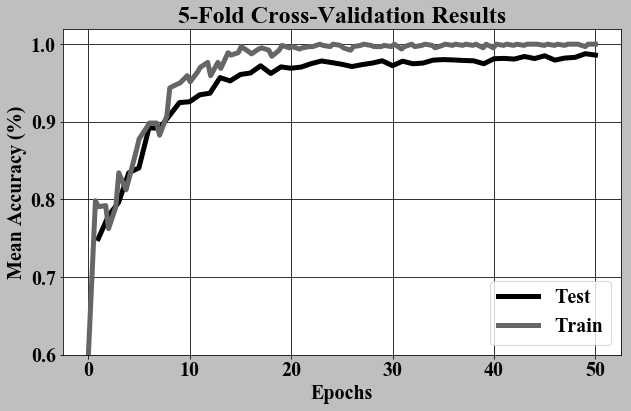

In [7]:
font = {'fontname':'Times New Roman'}
plt.rcParams["font.family"] = "Times New Roman"
matplotlib.rcParams.update({'font.size': 20})

plt.figure(figsize=(10,6))
plt.style.use('grayscale')
plt.plot(epochs, val_mean, label='Test', linewidth=5)
plt.plot(res_data[:,0], res_data[:,1], label='Train', linewidth=5)
plt.legend(loc='lower right')
plt.xlabel('Epochs')
plt.ylabel('Mean Accuracy (%)')
plt.title('5-Fold Cross-Validation Results')
plt.ylim([0.6, 1.02])
plt.grid()
plt.show()

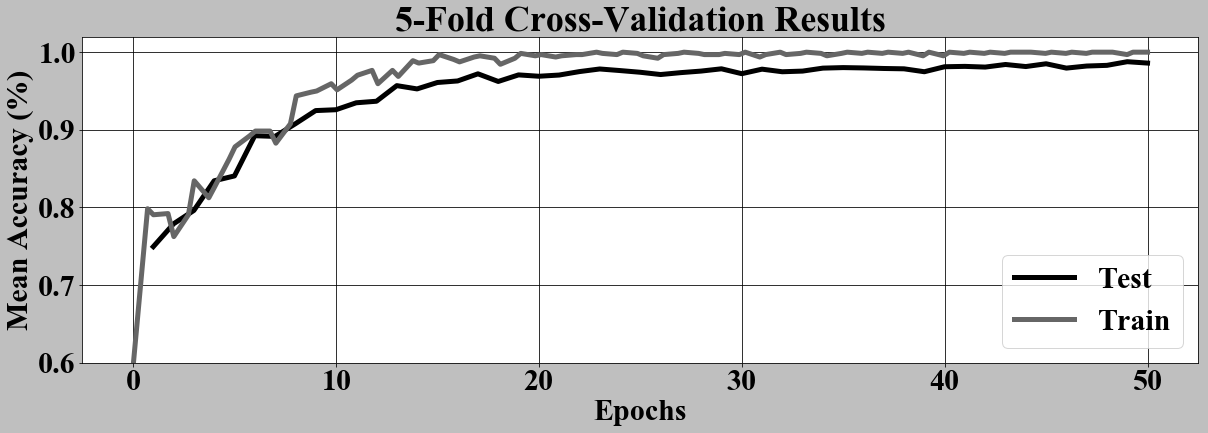

In [9]:
font = {'fontname':'Times New Roman'}
plt.rcParams["font.family"] = "Times New Roman"
matplotlib.rcParams.update({'font.size': 30})

plt.figure(figsize=(20,6))
plt.style.use('grayscale')
plt.plot(epochs, val_mean, label='Test', linewidth=5)
plt.plot(res_data[:,0], res_data[:,1], label='Train', linewidth=5)
plt.legend(loc='lower right')
plt.xlabel('Epochs')
plt.ylabel('Mean Accuracy (%)')
plt.title('5-Fold Cross-Validation Results')
plt.ylim([0.6, 1.02])
plt.grid()
plt.show()